# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

### Importing the data

In [1]:
# use these links to do so:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Churn_data = pd.read_csv('Churn.csv')

In [3]:
Churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Understanding the data

In [4]:
Churn_data.shape

(7043, 21)

In [5]:
Churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
#Checking if any values in the variables are null 
Churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
Churn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Data Manipulation

In [8]:
#Removing missing values 
Churn_data.dropna(inplace = True)

In [9]:
#Remove customer IDs from the data set
Churn_data1 = Churn_data.iloc[:,1:]

In [10]:
#Converting the target variable in a numeric variable
Churn_data1['Churn'].replace(to_replace='Yes', value=1, inplace=True)
Churn_data1['Churn'].replace(to_replace='No',  value=0, inplace=True)


In [11]:
Churn_data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [12]:
#Replacing spaces with null values in total charges column
Churn_data1['TotalCharges'] = Churn_data1["TotalCharges"].replace(" ",np.nan)

In [13]:
#Dropping null values from total charges column which contain .15% missing data 
Churn_data1 =Churn_data1[Churn_data["TotalCharges"].notnull()]
Churn_data1 = Churn_data1.reset_index()[Churn_data1.columns]

In [14]:
#convert to float type
Churn_data1["TotalCharges"] = Churn_data1["TotalCharges"].astype(float)

In [74]:
#replace values
Churn_data1["TotalCharges"] = Churn_data1["TotalCharges"].replace("nan",0)

In [75]:
Churn_data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [81]:
#Let's convert all the categorical variables into numerical variables
from sklearn.preprocessing import LabelEncoder
list=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
       'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','TotalCharges']
encoder = LabelEncoder()
for i in list:
    Churn_data1[i]=encoder.fit_transform(Churn_data1[i]) 

In [82]:
Churn_data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,74,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,3624,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,536,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,3570,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,674,1


In [83]:
#analysing data like
#GOAL : 2 classes Churners and non-Churners
#which features are the driving factors for churn

In [84]:
#checking the distribution of variables-normal distrubition(-1.96 to +1.96)
from scipy import stats

In [85]:
list1=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
      'StreamingTV', 'StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']
for i in list1:
    print('skewness and Kurtosis for '+ str(i)+': '+str(stats.skew(Churn_data1[i]))+' and '+ str(stats.kurtosis(Churn_data1[i])))

skewness and Kurtosis for gender: -0.019026844201506316 and -1.9996379791997316
skewness and Kurtosis for Partner: 0.06790791663616631 and -1.9953885148581358
skewness and Kurtosis for Dependents: 0.8750121687324416 and -1.2343537045701498
skewness and Kurtosis for PhoneService: -2.726572082066742 and 5.43419531870577
skewness and Kurtosis for MultipleLines: 0.11869417122754078 and -1.877896163136919
skewness and Kurtosis for InternetService: 0.2053797021050899 and -1.1455439228510642
skewness and Kurtosis for OnlineSecurity: 0.41689625409816844 and -1.52073777435781
skewness and Kurtosis for OnlineBackup: 0.18289142401475716 and -1.6845474279139756
skewness and Kurtosis for DeviceProtection: 0.1868074171892961 and -1.6828642131633627
skewness and Kurtosis for TechSupport: 0.40227880430729396 and -1.534763421989415
skewness and Kurtosis for StreamingTV: 0.028479564059039238 and -1.7224591162360174
skewness and Kurtosis for StreamingMovies: 0.014653534183632504 and -1.7231512084922107
s

In [86]:
print(Churn_data1.corr())

                    gender  SeniorCitizen   Partner  Dependents    tenure  \
gender            1.000000      -0.001874 -0.001808    0.010517  0.005106   
SeniorCitizen    -0.001874       1.000000  0.016479   -0.211185  0.016567   
Partner          -0.001808       0.016479  1.000000    0.452676  0.379697   
Dependents        0.010517      -0.211185  0.452676    1.000000  0.159712   
tenure            0.005106       0.016567  0.379697    0.159712  1.000000   
PhoneService     -0.006488       0.008576  0.017706   -0.001762  0.008448   
MultipleLines    -0.006739       0.146185  0.142410   -0.024991  0.343032   
InternetService  -0.000863      -0.032310  0.000891    0.044590 -0.030359   
OnlineSecurity   -0.015017      -0.128221  0.150828    0.152166  0.325468   
OnlineBackup     -0.012057      -0.013632  0.153130    0.091015  0.370876   
DeviceProtection  0.000549      -0.021398  0.166330    0.080537  0.371105   
TechSupport      -0.006825      -0.151268  0.126733    0.133524  0.322942   

In [87]:
#conclusion: we can see the Normality for PhoneService calls is not statisfied


### Data Visualization

AxesSubplot(0.125,0.125;0.775x0.755)


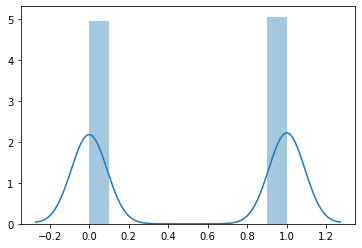

In [113]:
#checking the Gender distribution- it is normal
print(sns.distplot([Churn_data1.gender]))


In [89]:
#both male and female is equally distrubuted

<bound method Axis.set_major_formatter of <matplotlib.axis.YAxis object at 0x000001C0D35D13C8>>

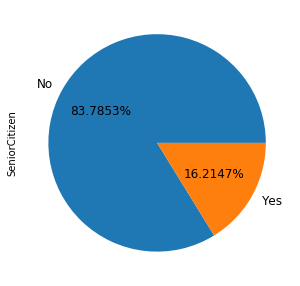

In [90]:
plot_d = (Churn_data1['SeniorCitizen'].value_counts()*100.0 /len(Churn_data1))\
.plot.pie(autopct='%.4f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
plot_d.yaxis.set_major_formatter


In [91]:
#83% of people are younger and 16% people are seniorcitizens

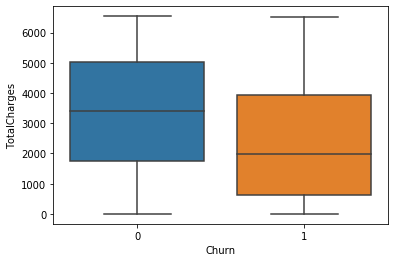

In [117]:
sns.boxplot(x='Churn',y='TotalCharges',data=Churn_data1)

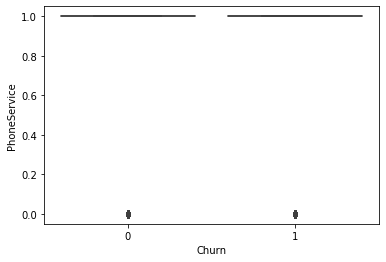

In [118]:
sns.boxplot(x='Churn',y='PhoneService',data=Churn_data1)

In [ ]:
#too much of outlayers

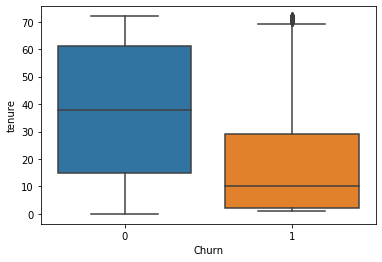

In [120]:
sns.boxplot(x='Churn',y='tenure',data=Churn_data1)

#churn when compared with tenure has an outlier
 It seems that there is higer churn when the total charges are lower.

Text(0.5, 1.0, '# of Customers by Contract Type')

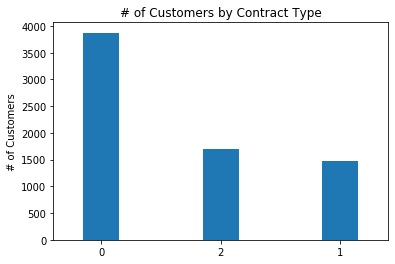

In [122]:
CCn = Churn_data1['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
CCn.set_ylabel('# of Customers')
CCn.set_title('# of Customers by Contract Type')

#As we can see from this graph most of the customers are in the month to month contract. While there are equal number of customers in the 1 year and 2 year contracts.

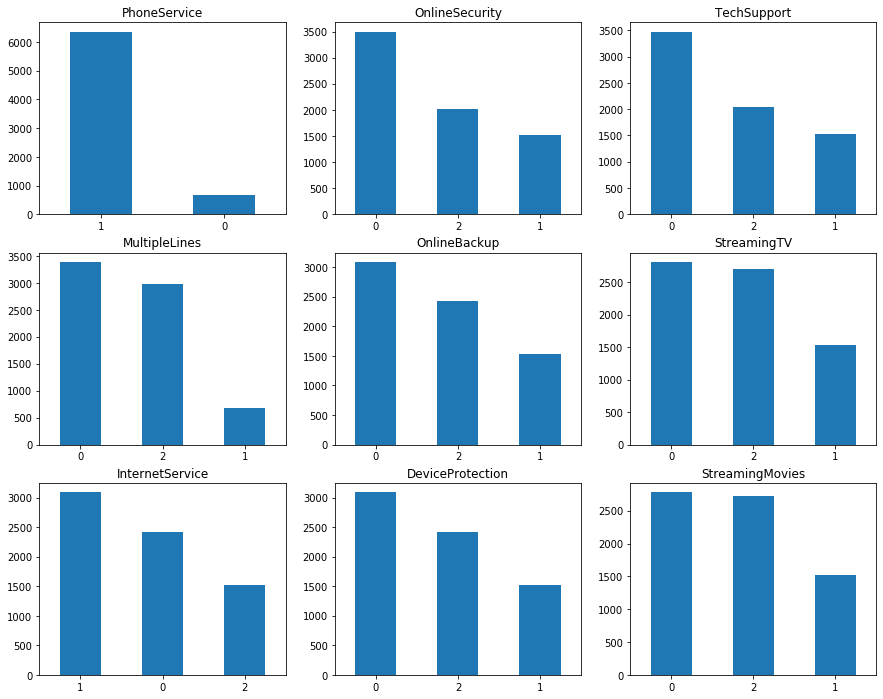

In [125]:
services_data = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services_data):
    if i < 3:
        ax = Churn_data1[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = Churn_data1[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = Churn_data1[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.
This is also what we saw in the earlier chart on correlation with the churn rate.

some of the analysis is done in exel using pivot tables and a copy will be sent

### Implement Machine Learning Models

In [126]:
#Scaling of the features
#Lets check the variance in magnitude of the features
Churn_data1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3106.343888,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1945.973288,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1382.500000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3070.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4790.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6540.000000,1.000000


In [127]:
#to scale import standardizer
from sklearn.preprocessing import StandardScaler

In [128]:
Churn_data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,74,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,3624,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,536,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,3570,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,674,1


In [129]:
Churn_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null int64
Churn               7043 non-null int64
dtypes: float64(1), int64(19)
memory usage: 1.1 MB


In [130]:
#scaling on the quantitative data
# We will use the data frame where we had created dummy variables
y = Churn_data1['Churn'].values
X = Churn_data1.drop(columns = ['Churn'])

In [131]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [132]:
#Training the model

In [133]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [134]:
print('shape of x_train:',X_train.shape)
print('shape of y_train:',X_test.shape)


shape of x_train: (4930, 19)
shape of y_train: (2113, 19)



# Applying Logestic Regression

In [135]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)
from sklearn import metrics
prediction_test = model.predict(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [136]:
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.7950780880265026


AxesSubplot(0.125,0.125;0.775x0.755)


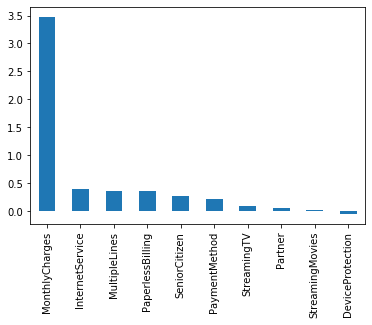

In [137]:
#To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

# Applying Random Forest


In [138]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=True, random_state=50, verbose=0,
                       warm_start=False)

In [139]:
from sklearn import metrics
## Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.794180269694819


In [140]:
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.794180269694819


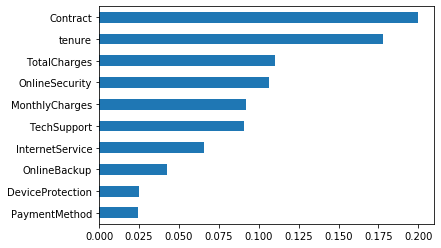

In [146]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

# Applying SVM

In [141]:
#Applying SVM
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model = SVC()
model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7977288857345636

In [143]:
#Model Evolution

In [144]:
from sklearn import metrics
## Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test,preds))

0.7977288857345636


In [145]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds))  

[[971  55]
 [230 153]]


# Final Conclusions

In [ ]:
Observations(Logestic Regression)

We can see that some variables have a negative relation to our predicted variable (Churn), while some have positive relation. Negative relation means that likeliness of churn decreases with that variable. Let us summarize some of the interesting features below:

As we saw in our EDA, having a 2 month contract reduces chances of churn. 2 month contract along with tenure have the most negative relation with Churn as predicted by logistic regressions
Having DSL internet service also reduces the proability of Churn
Lastly, total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates. This is interesting because although fibre optic services are faster, customers are likely to churn because of it. I think we need to explore more to better understad why this is happening

Observations:(Random Forest)

1.From random forest algorithm, monthly contract, tenure and total charges are the most important predictor variables to predict churn.
2.The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA